# Buscar relaciones entre las diferentes electrolineras para respaldar su clusterización según zona de uso 

In [2]:
import pandas as pd
import matplotlib.pylab as plt

In [38]:
# Tomamos el dataset de consumo por horas, NO EL DATASET DE ENERGÍA ACUMULADA DEL DÍA POR HORAS
data = pd.read_csv('Bcn_1h.csv')
time = pd.to_datetime(data['Time'])
data = data.drop(columns=['Time'])
stations = data.columns

data = data.applymap(lambda x: round(x/1000,3))
data['Time'] = time

In [39]:
data.head(3)

,"Power_PdRR Gavà: C. del Progres, 54","Power_PdRR Sant Cugat del Vallès: Av. Via Augusta, 3",Power_PdRR Sant Joan Despi: C. TV3 - C. Jacint Verdaguer,Power_PdRR El Prat de Llobregat: Pl. Volateria (Mas Blau),Power_PdRR Pallejà: Rda. Santa Eulalia - C. Joan Maragall,"Power_PdRR Barberà del Vallés: C. Arquímedes, 8",Power_PdRR l'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes,Power_PdRL Sant Joan Despí: C. TV3 - C. Jacint Verdaguer,Power_PdRR Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer,Power_PdRR Badalona: C. Anna Tugas - Pg. Olof Palmer,...,Power_PdRR Montcada i Reixac: C. Tarragona - C. Pla de Matabous,Power_PdRL Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer,"Power_PdRL Gavà: C. del Progres, 54",Power_PdRL Montcada i Reixac: C. Tarragona - C. Pla de Matabous,Power_PdRL L'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes,"Power_PdRL Sant Cugat del Vallès: Av. Via Augusta, 3",Power_PdRL El Prat de Llobregat: Pl. Volateria (Mas Blau),"Power_PdRL Barberà del Vallés: C. Arquímedes, 8",Power_FLNR Sant Andreu da la Barca: Pg. Rafael de Casanova FGC,Time
0,6.401,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-31 00:00:00
1,0.000,10.507,12.574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-31 01:00:00
2,0.000,0.000,1.942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-31 02:00:00


### Media por horas de cada estación

In [40]:
means = data.drop(columns=['Time']).mean().sort_index()
means.index =  means.index.str.replace('Power_','')
color = ['b' if x.startswith('PdRL') else 'r' if x.startswith('PdRR') else 'g' for x in means.index]

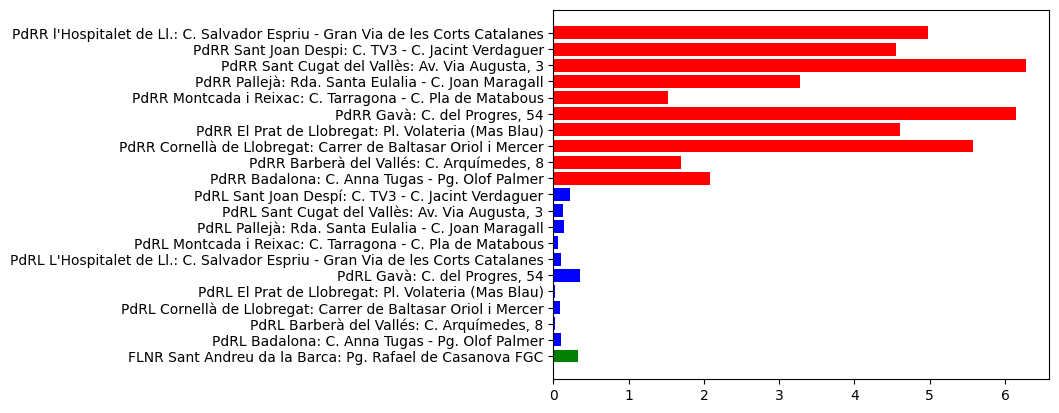

In [41]:
plt.barh(means.index, means.values, color=color)
plt.show()

## Distribución de las recargas

In [42]:
data['Hour'] = data['Time'].map(lambda x: x.hour)
data['Weekday'] = data['Time'].map(lambda x: x.weekday())
data['Day'] = data['Time'].map(lambda x: x.day)

extra_cols = ['Hour', 'Weekday','Day','Time']

In [43]:
data

,"Power_PdRR Gavà: C. del Progres, 54","Power_PdRR Sant Cugat del Vallès: Av. Via Augusta, 3",Power_PdRR Sant Joan Despi: C. TV3 - C. Jacint Verdaguer,Power_PdRR El Prat de Llobregat: Pl. Volateria (Mas Blau),Power_PdRR Pallejà: Rda. Santa Eulalia - C. Joan Maragall,"Power_PdRR Barberà del Vallés: C. Arquímedes, 8",Power_PdRR l'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes,Power_PdRL Sant Joan Despí: C. TV3 - C. Jacint Verdaguer,Power_PdRR Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer,Power_PdRR Badalona: C. Anna Tugas - Pg. Olof Palmer,...,Power_PdRL Montcada i Reixac: C. Tarragona - C. Pla de Matabous,Power_PdRL L'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes,"Power_PdRL Sant Cugat del Vallès: Av. Via Augusta, 3",Power_PdRL El Prat de Llobregat: Pl. Volateria (Mas Blau),"Power_PdRL Barberà del Vallés: C. Arquímedes, 8",Power_FLNR Sant Andreu da la Barca: Pg. Rafael de Casanova FGC,Time,Hour,Weekday,Day
0,6.401,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.0,...,0.0,0.0,0.00,0.0,0.000,0.0,2018-12-31 00:00:00,0,0,31
1,0.000,10.507,12.574,0.000,0.000,0.0,0.000,0.0,0.000,0.0,...,0.0,0.0,0.00,0.0,0.000,0.0,2018-12-31 01:00:00,1,0,31
2,0.000,0.000,1.942,0.000,0.000,0.0,0.000,0.0,0.000,0.0,...,0.0,0.0,0.00,0.0,0.000,0.0,2018-12-31 02:00:00,2,0,31
3,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.0,...,0.0,0.0,0.00,0.0,0.000,0.0,2018-12-31 03:00:00,3,0,31
4,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.0,...,0.0,0.0,0.00,0.0,0.000,0.0,2018-12-31 04:00:00,4,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8778,13.292,27.593,0.000,5.211,0.000,0.0,1.941,0.0,13.714,0.0,...,0.0,0.0,0.24,0.0,2.376,0.0,2019-12-31 18:00:00,18,1,31
8779,9.473,2.895,0.000,0.000,0.000,0.0,0.000,0.0,17.260,0.0,...,0.0,0.0,0.00,0.0,0.040,0.0,2019-12-31 19:00:00,19,1,31
8780,20.402,0.000,0.000,6.905,26.008,0.0,0.000,0.0,5.013,0.0,...,0.0,0.0,0.00,0.0,0.000,0.0,2019-12-31 20:00:00,20,1,31
8781,0.000,0.000,0.000,0.000,0.000,0.0,17.010,0.0,0.000,0.0,...,0.0,0.0,0.00,0.0,0.000,0.0,2019-12-31 21:00:00,21,1,31


In [44]:
def group_by_variable(col):

    dropcols = [x for x in extra_cols if x!=col]
    return data.drop(columns=dropcols).groupby([col]).mean()

grouped_hour = group_by_variable('Hour')
grouped_day = group_by_variable('Day')
grouped_weekday = group_by_variable('Weekday')

# Estaciones rápidas

In [45]:
# Cogemos lista de estaciones rápidas
fast_stats = [x.removeprefix('Power_PdRR') for x in stations if 'PdRR' in x]

# Subplots are organized in a Rows x Cols Grid
Tot = len(fast_stats)  # Total number of plots
Cols = 2 # Number of columns

# Compute Rows required
Rows = Tot // Cols 

if Tot % Cols != 0:
    Rows += 1

# Create a Position index
Position = range(1,Tot + 1)

## Día del mes

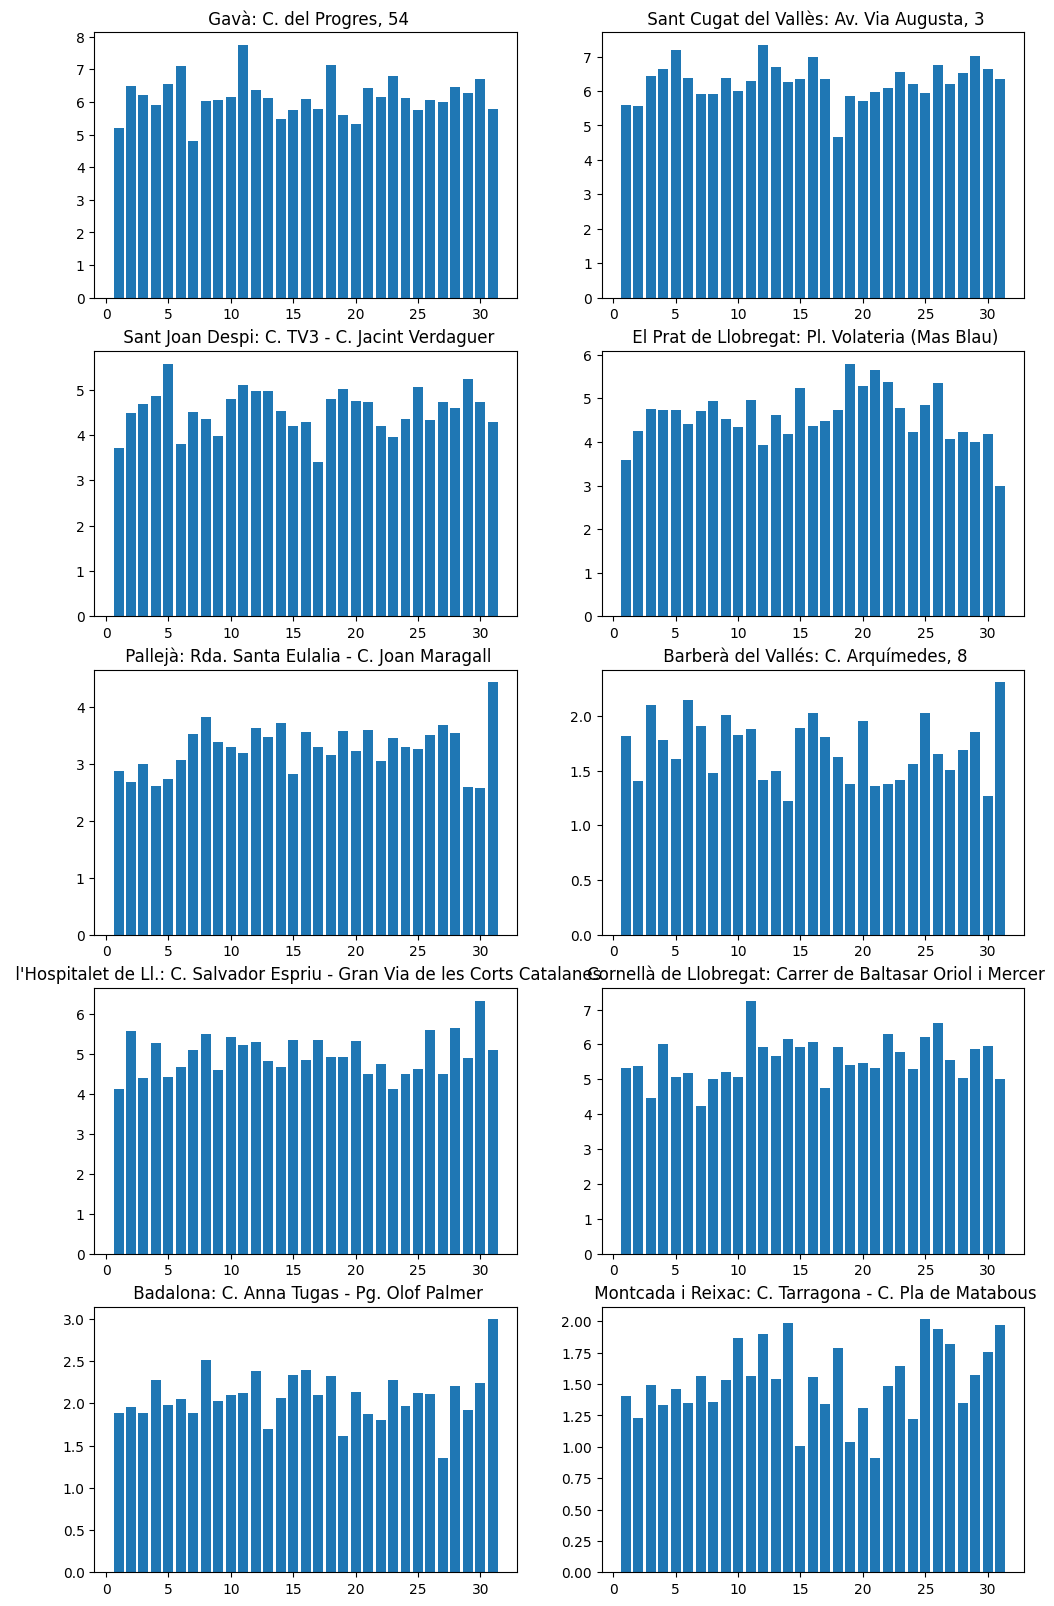

In [46]:
fig = plt.figure(1, figsize=(12,20))
for k in range(Tot):
    ax = fig.add_subplot(Rows,Cols,Position[k])
    ax.bar(grouped_day.index, grouped_day['Power_PdRR'+fast_stats[k]])   
    ax.set_title(fast_stats[k], size=12)

plt.show()

## Día de la semana

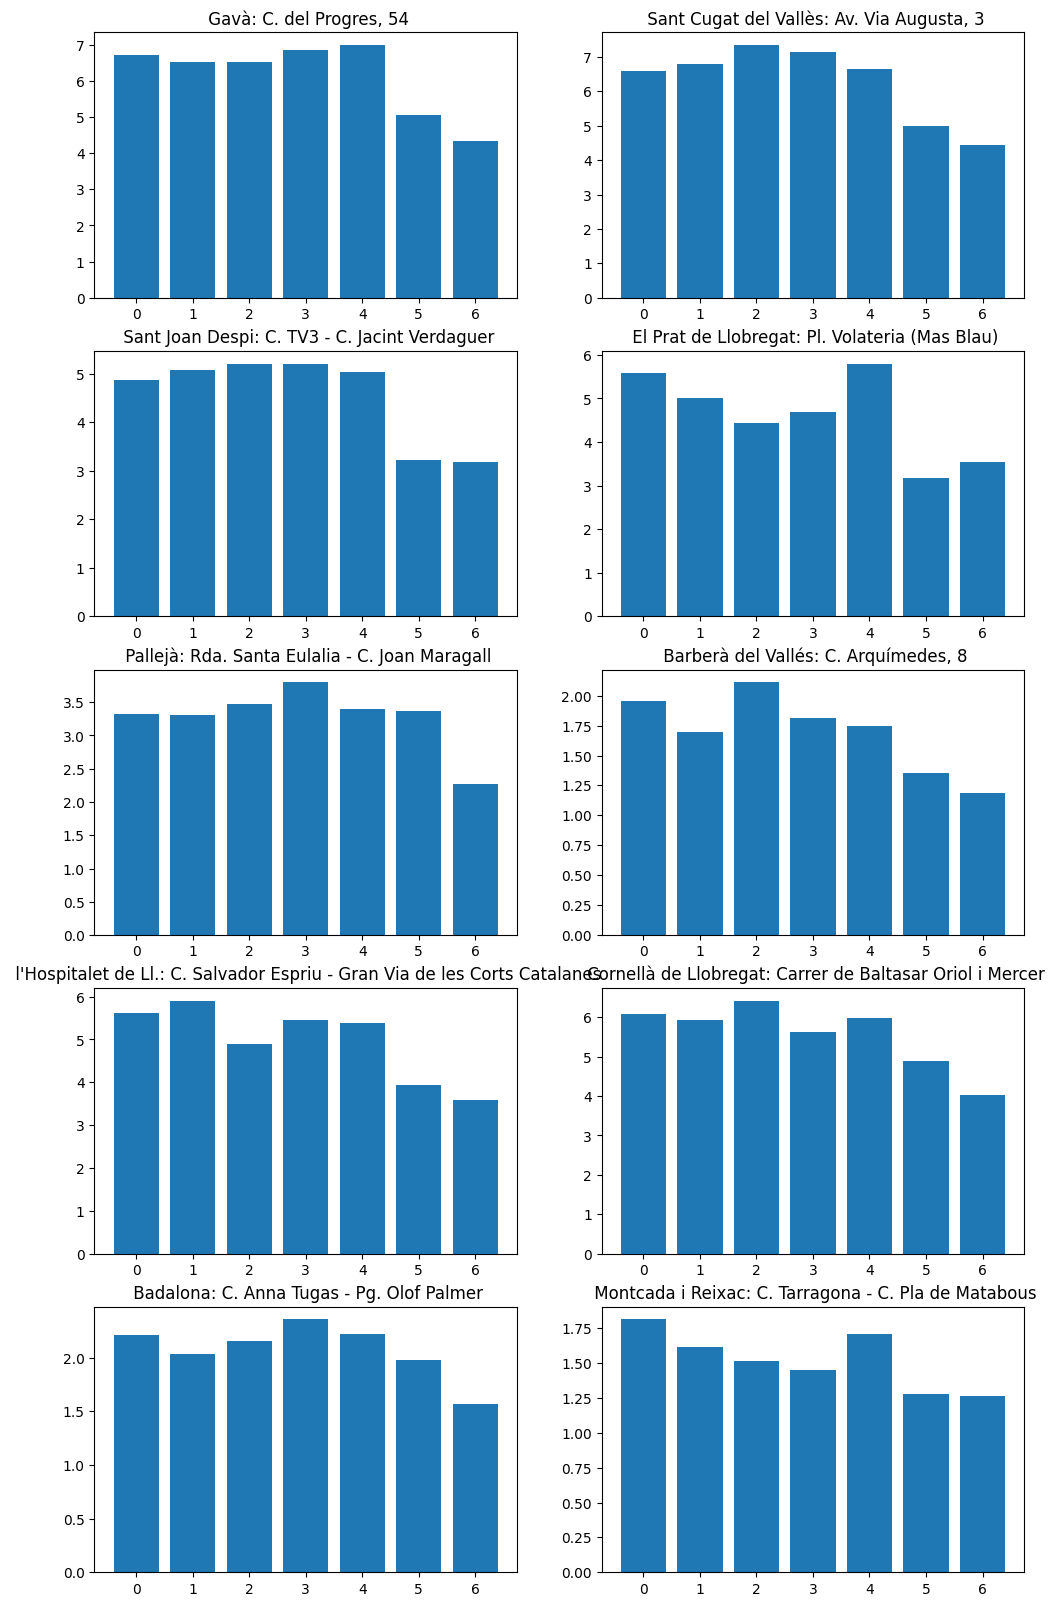

In [47]:
fig = plt.figure(1, figsize=(12,20))
for k in range(Tot):
    ax = fig.add_subplot(Rows,Cols,Position[k])
    ax.bar(grouped_weekday.index, grouped_weekday['Power_PdRR'+fast_stats[k]])   
    ax.set_title(fast_stats[k], size=12)

plt.show()

Tienen bajada los fines de semana:
- 

## Hora

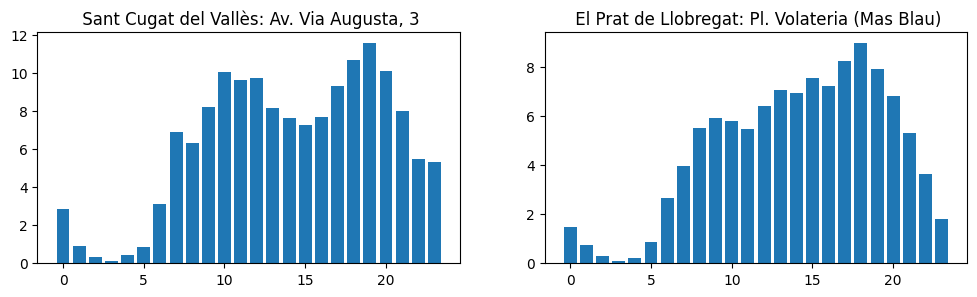

In [114]:
fig = plt.figure(1, figsize=(12,3))
ax = fig.add_subplot(1,2,1)
ax.bar(grouped_hour.index, grouped_hour['Power_PdRR'+fast_stats[1]])   
ax.set_title(fast_stats[1], size=12)

ax = fig.add_subplot(1,2,2)
ax.bar(grouped_hour.index, grouped_hour['Power_PdRR'+fast_stats[3]])   
ax.set_title(fast_stats[3], size=12)

plt.show()

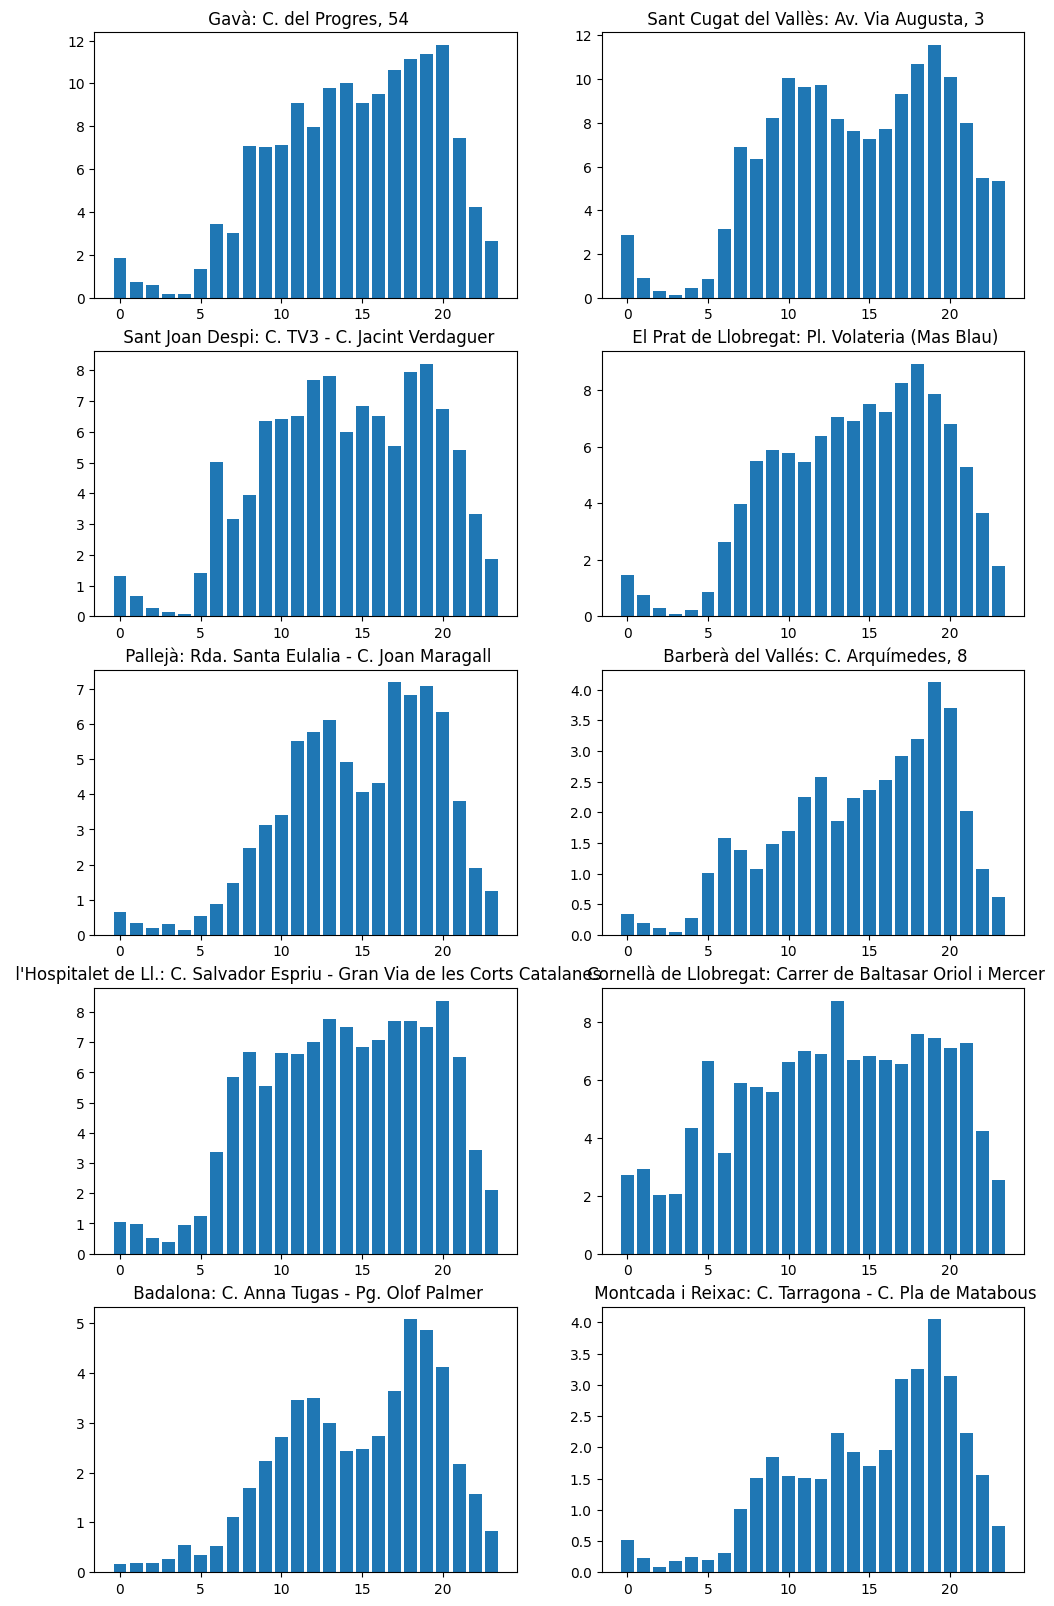

In [112]:
fig = plt.figure(1, figsize=(12,20))
for k in range(Tot):
    ax = fig.add_subplot(Rows,Cols,Position[k])
    ax.bar(grouped_hour.index, grouped_hour['Power_PdRR'+fast_stats[k]])   
    ax.set_title(fast_stats[k], size=12)

plt.show()

Tienen bajada en torno a las 15h:
- Sant Cugat
- Sant Joan Despi
- Pallejà
- Badalona

No tienen bajada:
- Gavà
- Prat
- Barberà
- Cornella

Dudoso:
- Montcada
- Hospitalet

# Estaciones lentas

In [49]:
# Cogemos lista de estaciones rápidas
slow_stats = [x.removeprefix('Power_PdRL') for x in stations if 'PdRL' in x]

# Subplots are organized in a Rows x Cols Grid
Tot_s = len(slow_stats)  # Total number of plots
Cols_s = 2 # Number of columns

# Compute Rows required
Rows_s = Tot_s // Cols_s 

if Tot_s % Cols_s != 0:
    Rows_s += 1

# Create a Position index
Position_s = range(1,Tot_s + 1)

## Día del mes

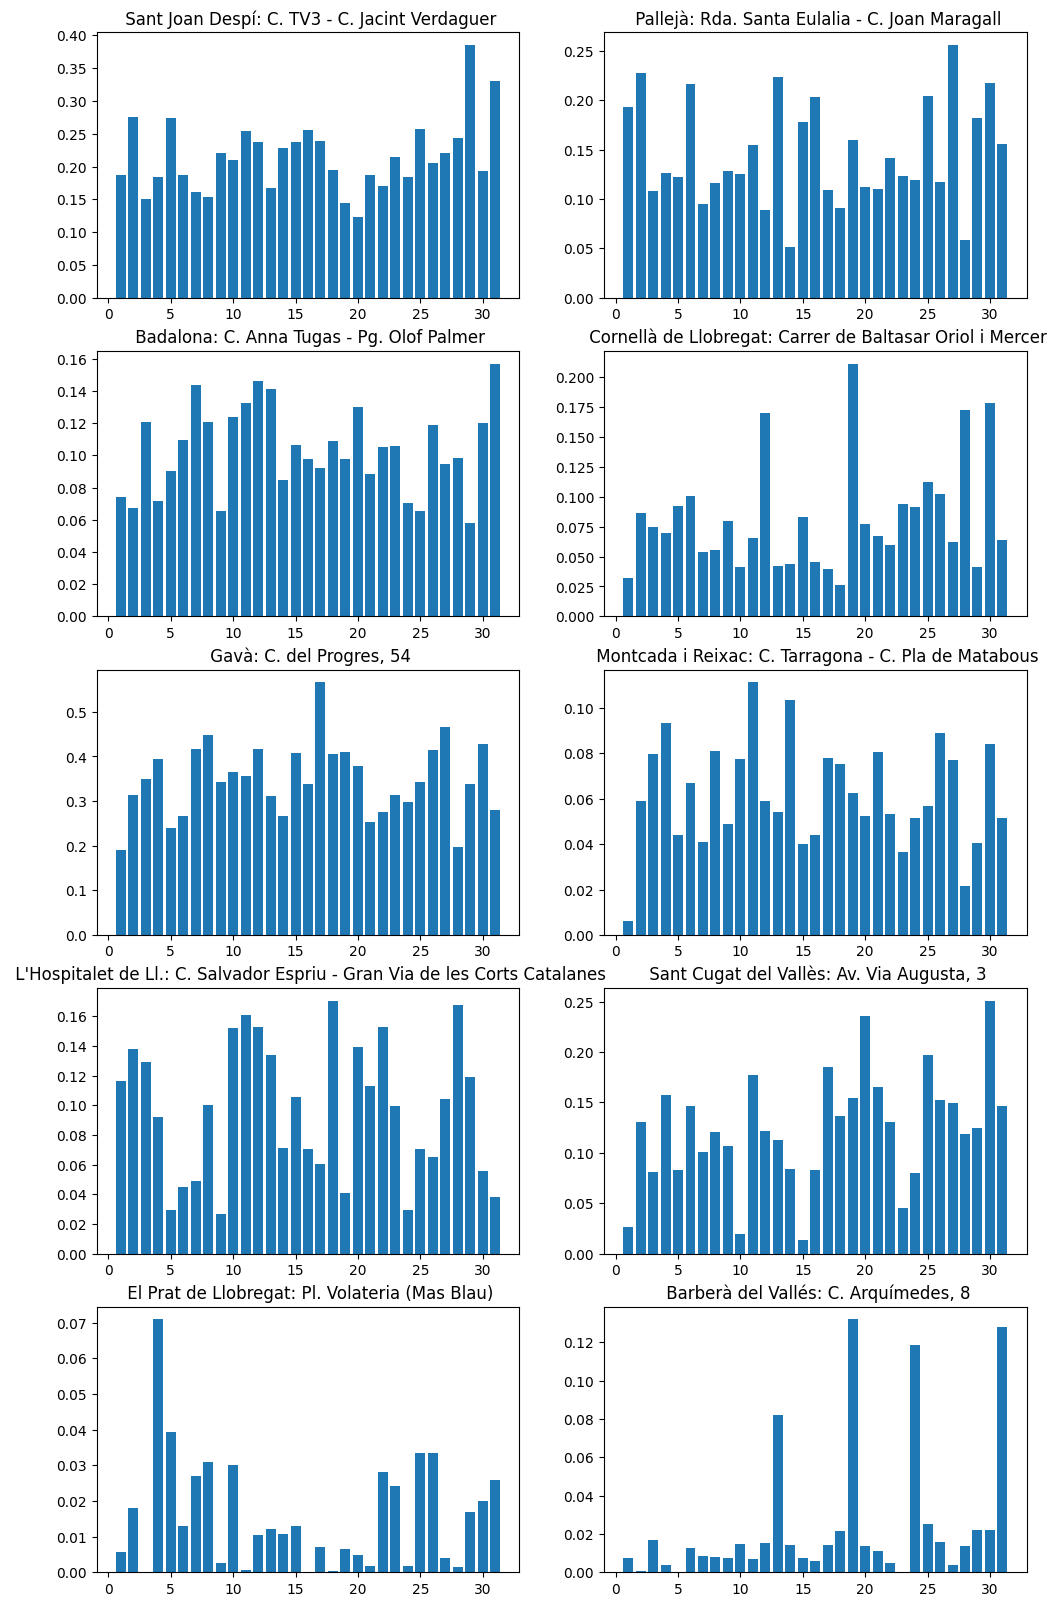

In [50]:
fig = plt.figure(1, figsize=(12,20))
for k in range(Tot_s):
    ax = fig.add_subplot(Rows_s,Cols_s,Position_s[k])
    ax.bar(grouped_day.index, grouped_day['Power_PdRL'+slow_stats[k]])   
    ax.set_title(slow_stats[k], size=12)

plt.show()

## Día de la semana

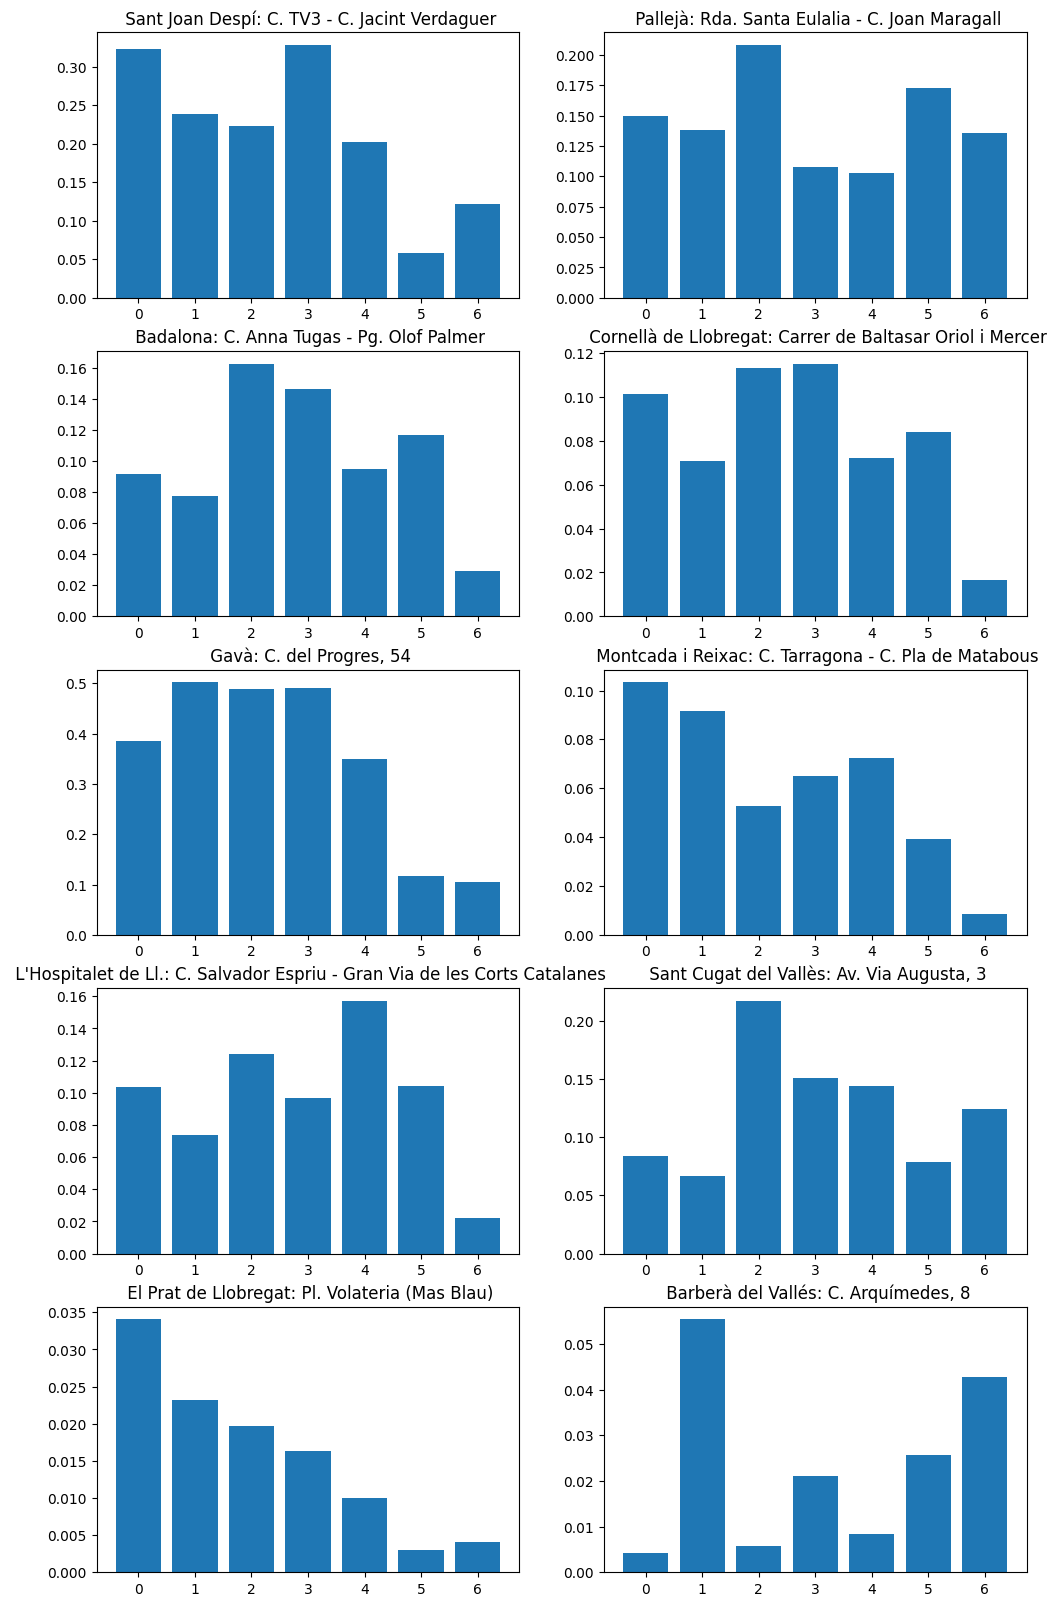

In [51]:
fig = plt.figure(1, figsize=(12,20))
for k in range(Tot_s):
    ax = fig.add_subplot(Rows_s,Cols_s,Position_s[k])
    ax.bar(grouped_weekday.index, grouped_weekday['Power_PdRL'+slow_stats[k]])   
    ax.set_title(slow_stats[k], size=12)

plt.show()

Estaciones lentas que tienen recargas más altas los fines de semana:
- Barberà del Vallés
- Pallejà
- Sant Cugat del Vallés 

## Hora

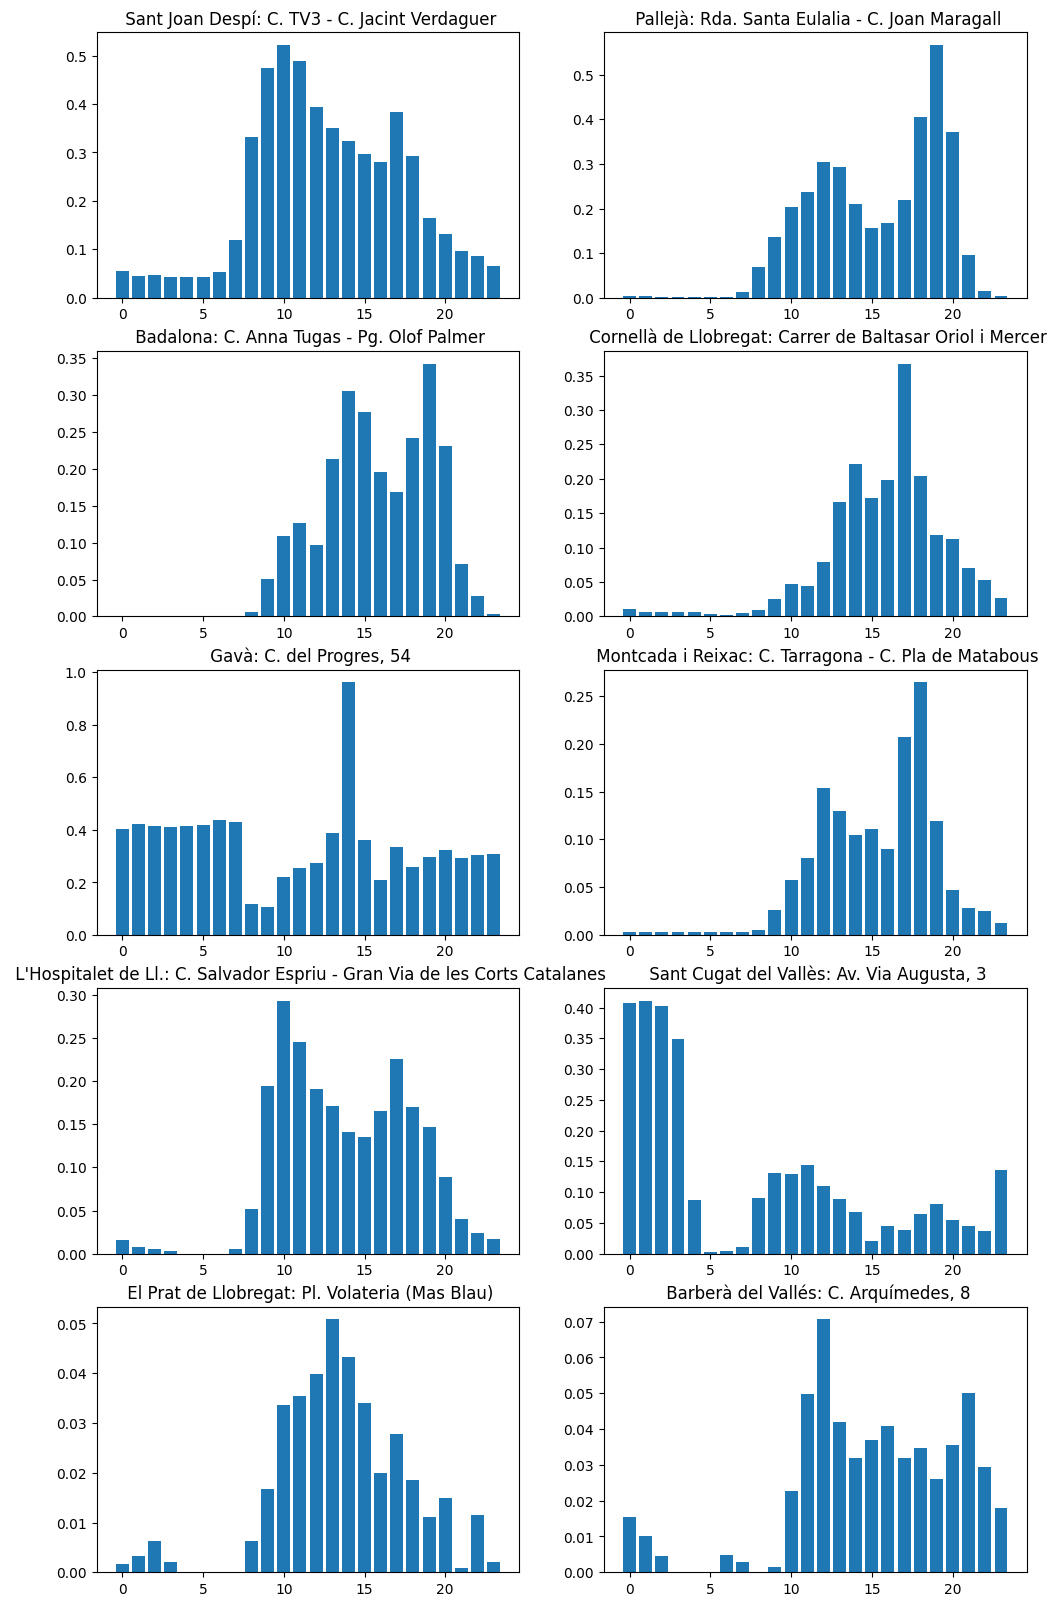

In [52]:
fig = plt.figure(1, figsize=(12,20))
for k in range(Tot_s):
    ax = fig.add_subplot(Rows_s,Cols_s,Position_s[k])
    ax.bar(grouped_hour.index, grouped_hour['Power_PdRL'+slow_stats[k]])   
    ax.set_title(slow_stats[k], size=12)

plt.show()

Recargan por la noche:
- Sant Cugat
- Gavà
- Sant Joan Despì

# De manera numérica

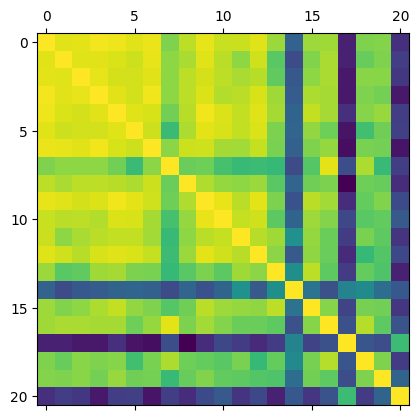

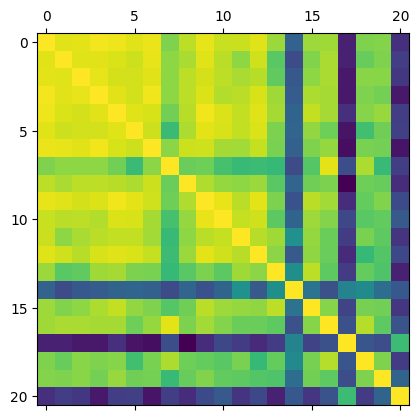

In [53]:
normalized_hour=(grouped_hour-grouped_hour.min())/(grouped_hour.max()-grouped_hour.min())

plt.matshow(normalized_hour.corr())
plt.show()

plt.matshow(grouped_hour.corr())
plt.show()

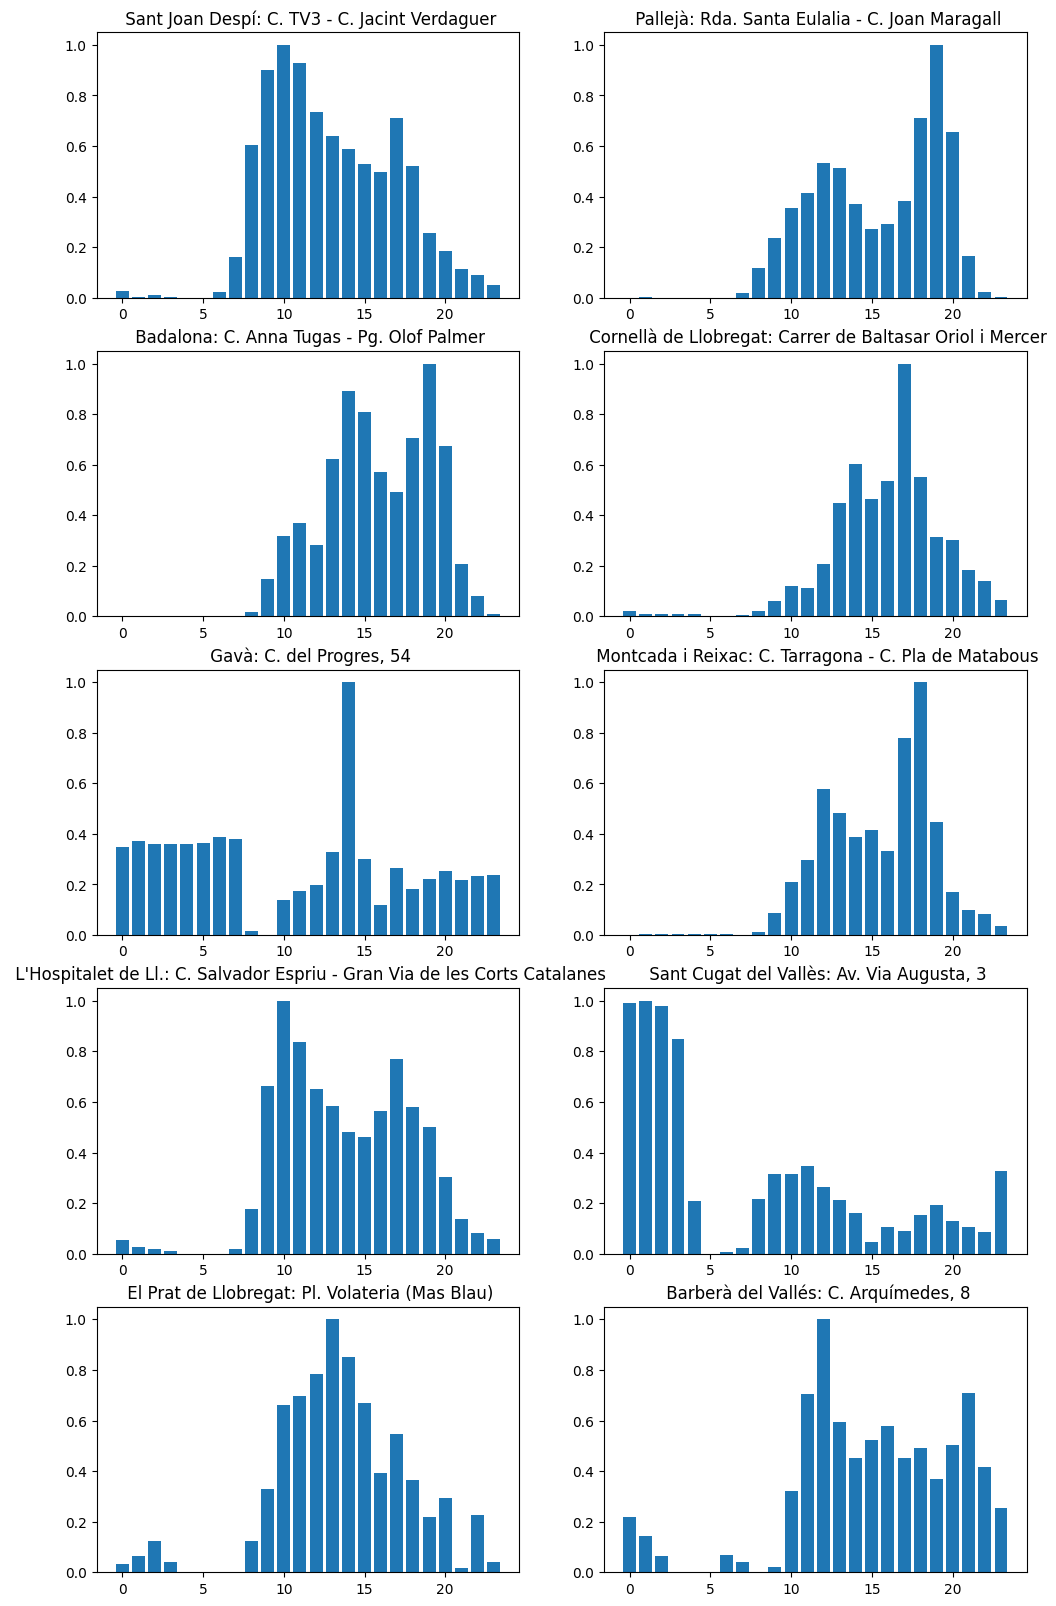

In [54]:
fig = plt.figure(1, figsize=(12,20))
for k in range(Tot_s):
    ax = fig.add_subplot(Rows_s,Cols_s,Position_s[k])
    ax.bar(normalized_hour.index, normalized_hour['Power_PdRL'+slow_stats[k]])   
    ax.set_title(slow_stats[k], size=12)

plt.show()

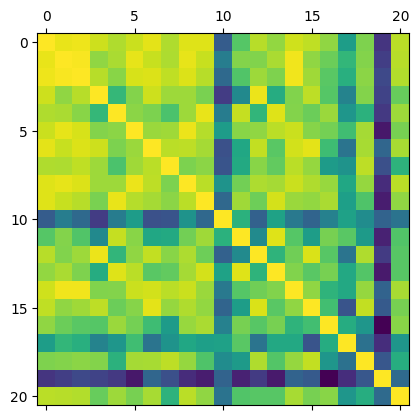

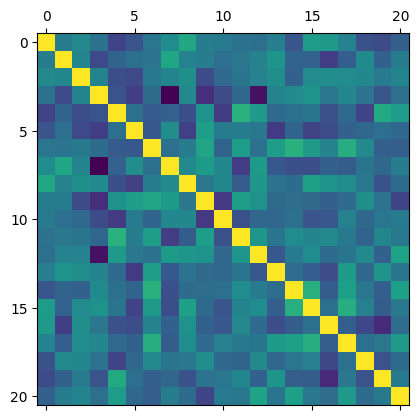

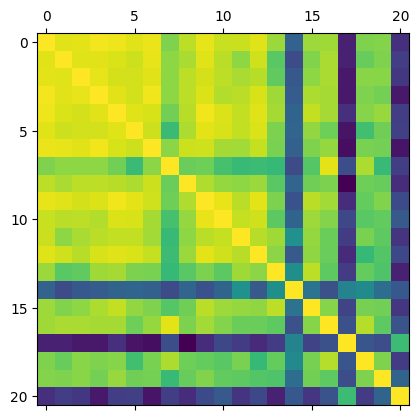

In [55]:
plt.matshow(grouped_weekday.corr())
plt.show()
plt.matshow(grouped_day.corr())
plt.show()
plt.matshow(grouped_hour.corr())
plt.show()

# K-means

In [68]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MaxAbsScaler

In [92]:
fast_cols = ['Power_PdRR'+x for x in fast_stats]
slow_cols = ['Power_PdRL'+x for x in slow_stats]
all_cols = fast_cols + slow_cols

In [104]:
def cluster_time_series(data, cols, n_clusters, algorithm='lloyd'):
    # Create dataset
    TSs = data[cols].transpose()

    # Create objects
    prep = MaxAbsScaler()
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10, algorithm=algorithm)

    # Scale and cluster
    scaled_data = prep.fit_transform(TSs)
    kmeans.fit(scaled_data)

    # Get results
    for cluster in range(kmeans.n_clusters):
        print(f"Cluster {cluster}")
        cluster_data = TSs[kmeans.labels_ == cluster]
        for i in range(cluster_data.shape[0]):
            print(cluster_data.index[i])
        print()

### Todas las estaciones

In [94]:
cluster_time_series(data, all_cols, 3, algorithm='lloyd')

Cluster 0
Power_PdRR Sant Cugat del Vallès: Av. Via Augusta, 3
Power_PdRR Sant Joan Despi: C. TV3 - C. Jacint Verdaguer
Power_PdRR Pallejà: Rda. Santa Eulalia - C. Joan Maragall
Power_PdRR Barberà del Vallés: C. Arquímedes, 8
Power_PdRR l'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes
Power_PdRR Badalona: C. Anna Tugas - Pg. Olof Palmer
Power_PdRR Montcada i Reixac: C. Tarragona - C. Pla de Matabous
Power_PdRL Sant Joan Despí: C. TV3 - C. Jacint Verdaguer
Power_PdRL Pallejà: Rda. Santa Eulalia - C. Joan Maragall
Power_PdRL Badalona: C. Anna Tugas - Pg. Olof Palmer
Power_PdRL Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer
Power_PdRL Gavà: C. del Progres, 54
Power_PdRL Montcada i Reixac: C. Tarragona - C. Pla de Matabous
Power_PdRL L'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes
Power_PdRL Sant Cugat del Vallès: Av. Via Augusta, 3
Power_PdRL El Prat de Llobregat: Pl. Volateria (Mas Blau)
Power_PdRL Barberà del Vallés: C. Arquím

In [98]:
cluster_time_series(data, all_cols, 4, algorithm='lloyd')

Cluster 0
Power_PdRR Sant Cugat del Vallès: Av. Via Augusta, 3

Cluster 1
Power_PdRR Sant Joan Despi: C. TV3 - C. Jacint Verdaguer
Power_PdRR El Prat de Llobregat: Pl. Volateria (Mas Blau)
Power_PdRR Pallejà: Rda. Santa Eulalia - C. Joan Maragall
Power_PdRR Barberà del Vallés: C. Arquímedes, 8
Power_PdRR l'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes
Power_PdRR Badalona: C. Anna Tugas - Pg. Olof Palmer
Power_PdRR Montcada i Reixac: C. Tarragona - C. Pla de Matabous
Power_PdRL Sant Joan Despí: C. TV3 - C. Jacint Verdaguer
Power_PdRL Pallejà: Rda. Santa Eulalia - C. Joan Maragall
Power_PdRL Badalona: C. Anna Tugas - Pg. Olof Palmer
Power_PdRL Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer
Power_PdRL Gavà: C. del Progres, 54
Power_PdRL Montcada i Reixac: C. Tarragona - C. Pla de Matabous
Power_PdRL L'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes
Power_PdRL Sant Cugat del Vallès: Av. Via Augusta, 3
Power_PdRL El Prat de Llobreg

In [99]:
cluster_time_series(data, all_cols, 3, algorithm='elkan')

Cluster 0
Power_PdRR Sant Cugat del Vallès: Av. Via Augusta, 3
Power_PdRR Sant Joan Despi: C. TV3 - C. Jacint Verdaguer
Power_PdRR Pallejà: Rda. Santa Eulalia - C. Joan Maragall
Power_PdRR Barberà del Vallés: C. Arquímedes, 8
Power_PdRR l'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes
Power_PdRR Badalona: C. Anna Tugas - Pg. Olof Palmer
Power_PdRR Montcada i Reixac: C. Tarragona - C. Pla de Matabous
Power_PdRL Sant Joan Despí: C. TV3 - C. Jacint Verdaguer
Power_PdRL Pallejà: Rda. Santa Eulalia - C. Joan Maragall
Power_PdRL Badalona: C. Anna Tugas - Pg. Olof Palmer
Power_PdRL Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer
Power_PdRL Gavà: C. del Progres, 54
Power_PdRL Montcada i Reixac: C. Tarragona - C. Pla de Matabous
Power_PdRL L'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes
Power_PdRL Sant Cugat del Vallès: Av. Via Augusta, 3
Power_PdRL El Prat de Llobregat: Pl. Volateria (Mas Blau)
Power_PdRL Barberà del Vallés: C. Arquím

### Solo rápidas

In [96]:
cluster_time_series(data, fast_cols, 2, algorithm='lloyd')

Cluster 0
Power_PdRR Sant Cugat del Vallès: Av. Via Augusta, 3

Cluster 1
Power_PdRR Gavà: C. del Progres, 54
Power_PdRR Sant Joan Despi: C. TV3 - C. Jacint Verdaguer
Power_PdRR El Prat de Llobregat: Pl. Volateria (Mas Blau)
Power_PdRR Pallejà: Rda. Santa Eulalia - C. Joan Maragall
Power_PdRR Barberà del Vallés: C. Arquímedes, 8
Power_PdRR l'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes
Power_PdRR Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer
Power_PdRR Badalona: C. Anna Tugas - Pg. Olof Palmer
Power_PdRR Montcada i Reixac: C. Tarragona - C. Pla de Matabous



In [100]:
cluster_time_series(data, fast_cols, 2, algorithm='elkan')

Cluster 0
Power_PdRR Sant Cugat del Vallès: Av. Via Augusta, 3

Cluster 1
Power_PdRR Gavà: C. del Progres, 54
Power_PdRR Sant Joan Despi: C. TV3 - C. Jacint Verdaguer
Power_PdRR El Prat de Llobregat: Pl. Volateria (Mas Blau)
Power_PdRR Pallejà: Rda. Santa Eulalia - C. Joan Maragall
Power_PdRR Barberà del Vallés: C. Arquímedes, 8
Power_PdRR l'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes
Power_PdRR Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer
Power_PdRR Badalona: C. Anna Tugas - Pg. Olof Palmer
Power_PdRR Montcada i Reixac: C. Tarragona - C. Pla de Matabous



### Solo lentas

In [97]:
cluster_time_series(data, slow_cols, 2, algorithm='lloyd')

Cluster 0
Power_PdRL Sant Joan Despí: C. TV3 - C. Jacint Verdaguer
Power_PdRL Pallejà: Rda. Santa Eulalia - C. Joan Maragall
Power_PdRL Badalona: C. Anna Tugas - Pg. Olof Palmer
Power_PdRL Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer
Power_PdRL Montcada i Reixac: C. Tarragona - C. Pla de Matabous
Power_PdRL L'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes
Power_PdRL Sant Cugat del Vallès: Av. Via Augusta, 3
Power_PdRL El Prat de Llobregat: Pl. Volateria (Mas Blau)
Power_PdRL Barberà del Vallés: C. Arquímedes, 8

Cluster 1
Power_PdRL Gavà: C. del Progres, 54



In [105]:
cluster_time_series(data, slow_cols, 2, algorithm='elkan')

Cluster 0
Power_PdRL Sant Joan Despí: C. TV3 - C. Jacint Verdaguer
Power_PdRL Pallejà: Rda. Santa Eulalia - C. Joan Maragall
Power_PdRL Badalona: C. Anna Tugas - Pg. Olof Palmer
Power_PdRL Cornellà de Llobregat: Carrer de Baltasar Oriol i Mercer
Power_PdRL Montcada i Reixac: C. Tarragona - C. Pla de Matabous
Power_PdRL L'Hospitalet de Ll.: C. Salvador Espriu - Gran Via de les Corts Catalanes
Power_PdRL Sant Cugat del Vallès: Av. Via Augusta, 3
Power_PdRL El Prat de Llobregat: Pl. Volateria (Mas Blau)
Power_PdRL Barberà del Vallés: C. Arquímedes, 8

Cluster 1
Power_PdRL Gavà: C. del Progres, 54



#### Vemos que el algoritmo de clusterización (lloyd o elkan) parece no influir